In [52]:
import numpy as np 
from dataset.square_sequences import *

points, directions = generate_sequences(n=128, seed=13)

test_points, test_directions = generate_sequences(seed=19)

x_train, y_train = np.array(points), directions
x_test, y_test =np.array(test_points), test_directions
x_train.shape, x_test.shape

((128, 4, 2), (128, 4, 2))

| epoch 1 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 2 |  iter 1 / 8 | time 0[s] | loss 0.70
| epoch 3 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 4 |  iter 1 / 8 | time 0[s] | loss 0.70
| epoch 5 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 6 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 7 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 8 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 9 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 10 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 11 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 12 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 13 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 14 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 15 |  iter 1 / 8 | time 0[s] | loss 0.68
| epoch 16 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 17 |  iter 1 / 8 | time 0[s] | loss 0.68
| epoch 18 |  iter 1 / 8 | time 0[s] | loss 0.69
| epoch 19 |  iter 1 / 8 | time 0[s] | loss 0.68
| epoch 20 |  iter 1 / 8 | time 0[s] | loss 0.68
| epoch 21 |  iter 1 / 8 | ti

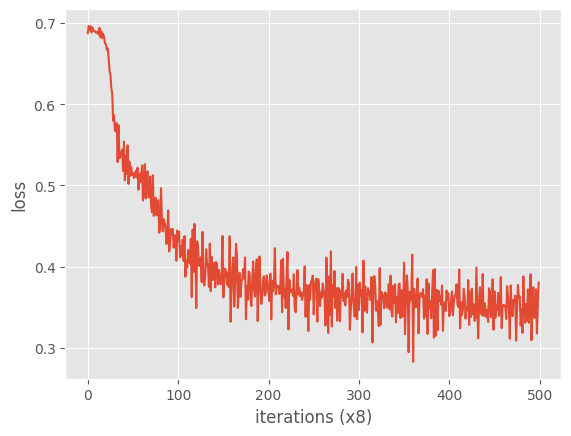

In [53]:
from simple_rnn import *
from common.optimizer import Adam
from common.trainer import Trainer
from common.functions import sigmoid 

max_epoch = 500
batch_size = 16
learning_rate = 0.01
max_iters = x_train.shape[0] // batch_size 

rnn_model = SimpleRNN(input_size=2, hidden_size=2)
optimizer = Adam(lr=learning_rate)


trainer = Trainer(rnn_model, optimizer)
trainer.fit(x_train, y_train.reshape(-1, 1), 
            max_epoch, batch_size, eval_interval=max_iters)
trainer.plot()

In [54]:

rnn_model.reset_state()
train_pred = (sigmoid(rnn_model.predict(x_train)) > 0.5)
train_acc = np.mean(train_pred == y_train.reshape(-1, 1))
print(f"Training accuracy: {train_acc:.4f}")
print('--'*25)

rnn_model.reset_state()
test_pred = (sigmoid(rnn_model.predict(x_test)) > 0.5)
test_acc = np.mean(test_pred == y_test.reshape(-1, 1))
print(f"Test accuracy: {test_acc:.4f}")
print('--'*25)

class_0_indices = (y_test == 0)
class_1_indices = (y_test == 1)

class_0_accuracy = np.mean(test_pred[class_0_indices] == y_test[class_0_indices].reshape(-1, 1))
class_1_accuracy = np.mean(test_pred[class_1_indices] == y_test[class_1_indices].reshape(-1, 1))

print(f"Class 0 test accuracy: {class_0_accuracy:.4f}")
print(f"Class 1 test accuracy: {class_1_accuracy:.4f}")

Training accuracy: 0.8906
--------------------------------------------------
Test accuracy: 0.8672
--------------------------------------------------
Class 0 test accuracy: 0.6792
Class 1 test accuracy: 1.0000
